## Experiments with Discrete Cosine Transform

In [7]:
import scipy
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image

Image Tensor Shape: (32, 32, 3)


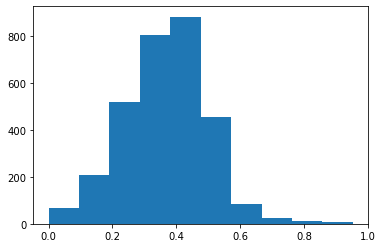

In [7]:
# Load the PNG image using Pillow
image_path = "assets/0_43.jpg"
image = Image.open(image_path)

# Convert the image to a NumPy array (tensor)
img = np.array(image)

# Print the shape of the image tensor
print("Image Tensor Shape:", img.shape)

# Optionally, you can normalize the pixel values to be between 0 and 1
img = img / 255.0

# img = torch.randn(28, 28).flatten()
plt.hist(img.flatten())
plt.show()

In [8]:
import numpy as np
from scipy.fftpack import dct, idct

# Step 1: Create a 3D tensor (image with three color channels)
# image = np.random.rand(28, 28, 3)  # Replace this with your actual image data

# Step 2: Apply 2D DCT to each channel
dct_image = np.zeros_like(img)

for i in range(img.shape[-1]):  # Iterate over color channels
    dct_image[:, :, i] = dct(dct(img[:, :, i], axis=0, norm='ortho'), axis=1, norm='ortho')

# Step 3: Print the transformed image
print("Transformed Image:")
print(dct_image)

# Step 4: Apply the inverse 2D DCT to each channel to get the original image back
original_image = np.zeros_like(img)

for i in range(img.shape[-1]):  # Iterate over color channels
    original_image[:, :, i] = idct(idct(dct_image[:, :, i], axis=0, norm='ortho'), axis=1, norm='ortho')

# Step 5: Print the original image
print("\nOriginal Image:")
print(original_image)

Transformed Image:
[[[ 1.41897059e+01  1.20887255e+01  8.99350490e+00]
  [-9.52662005e-01 -8.92352973e-01 -1.06566319e+00]
  [ 5.02892878e-01  2.58973395e-01 -4.34399787e-01]
  ...
  [-1.04514809e-02  3.25252368e-03 -3.15080256e-02]
  [ 2.16857436e-03  3.99012765e-03  5.65235612e-03]
  [ 3.36625716e-02  2.20804862e-02  6.13398235e-02]]

 [[-6.70909186e-01 -4.82847702e-01 -1.32672011e+00]
  [-8.18225743e-01 -8.85009224e-01 -1.34305729e+00]
  [-1.19499828e-01 -9.16997722e-03  4.54913506e-01]
  ...
  [ 4.94034291e-04  1.71056427e-02  1.24448077e-02]
  [ 3.97555404e-04  7.76903620e-04  1.38218933e-03]
  [ 1.84010619e-02  1.86216656e-03  1.92903345e-03]]

 [[-7.75010652e-01 -2.14459033e-01  2.34303765e-01]
  [ 3.23923591e-01  3.80626549e-01  8.33803521e-01]
  [ 3.01965636e-01  3.29444028e-01  1.48575257e-01]
  ...
  [-7.16183160e-03 -4.58922473e-03 -2.16704219e-02]
  [-5.09199194e-03 -2.59119025e-03 -6.53915546e-03]
  [-9.65937100e-03 -9.52522006e-03  2.21638426e-03]]

 ...

 [[ 6.06145535e

(array([ 67., 209., 520., 807., 883., 456.,  84.,  26.,  14.,   6.]),
 array([0.        , 0.09529412, 0.19058824, 0.28588235, 0.38117647,
        0.47647059, 0.57176471, 0.66705882, 0.76235294, 0.85764706,
        0.95294118]),
 <BarContainer object of 10 artists>)

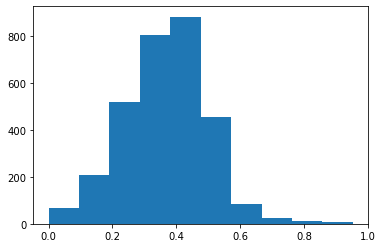

In [9]:
plt.hist(img.flatten())

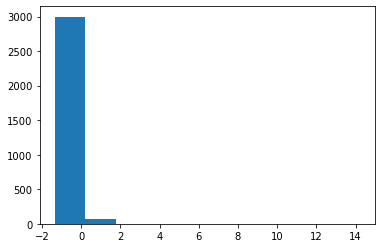

In [10]:
plt.hist(dct_image.flatten())
plt.show()

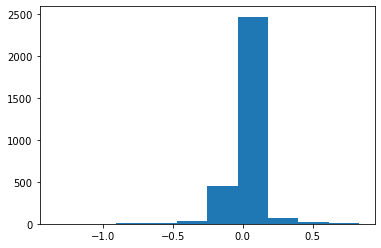

In [11]:
plt.hist(dct_image[dct_image < 1])
plt.show()

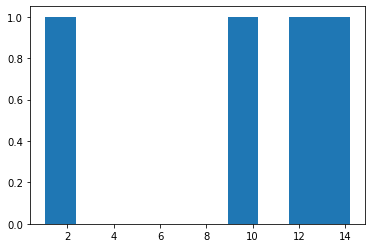

In [12]:
# That's actually a lot of sparsity!
plt.hist(dct_image[dct_image > 1])
plt.show()

## Rotate points by 45°
**POINTLESS BC WE ARE NOT IN $R^2$**

In [3]:
import numpy as np

In [4]:
data = np.array([[1, 1], [2, 2], [3, 3]])
theta = np.pi / 4
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

rotated_data = np.matmul(data, rotation_matrix)

In [11]:
data

array([[1, 1],
       [2, 2],
       [3, 3]])

In [12]:
rotated_data.round(2)

array([[ 1.41,  0.  ],
       [ 2.83,  0.  ],
       [ 4.24, -0.  ]])

## Sample uniformly from l1-ball

According to: https://mathoverflow.net/questions/9185/how-to-generate-random-points-in-ell-p-balls

Sample $X_n \sim \exp(-|x|^p)$

Sample $Y \sim exponential(1)$

<br/>

$\frac{(X_1,\ldots,X_n)}{(Y+\sum |X_i|^p)^{1/p}}$

In [97]:
import torch
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,6)

def generate_samples(N, D, p):
    # Sample n values from the distribution exp(-|x|^p)
    Xn = torch.empty(N, D).exponential_(1)
    Xn *= torch.randint(0, 2, size=(N, D)) * 2 - 1  # Randomly assign signs

    # Sample a value from the exponential distribution with parameter 1
    Y = torch.empty(N, D).exponential_(1)

    # Calculate the ratio (X1, ..., Xn) / (Y + sum(|Xi|^p))^(1/p)
    denominator = Y + torch.sum(torch.abs(Xn)**p, dim=1, keepdim=True)
    samples = Xn / denominator**(1/p)

    return samples

# Set the value of p
p = 1

# Set the number of samples (N) and dimension (D)
N = 5
D = 3

# Generate samples
samples = generate_samples(N, D, p)

# Print the result
print("Generated samples matrix:")
print(samples)

Generated samples matrix:
tensor([[-1.4784e-01, -1.8446e-01,  2.2600e-01],
        [ 1.0623e-01, -5.4316e-01,  6.2670e-02],
        [ 1.2077e-01,  5.5778e-02,  4.7400e-01],
        [ 1.0924e-01, -5.1727e-01, -2.5183e-01],
        [-2.3557e-01, -4.8820e-04, -1.8954e-01]])


In [98]:
samples = generate_samples(10000, 2, 1)

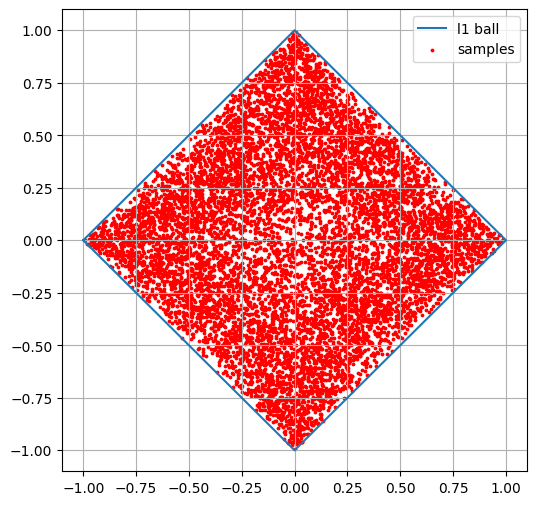

In [113]:
x_coords, y_coords = list(zip(*samples))

l1_points = [(-1, 0), (0, 1), (1, 0), (0, -1), (-1, 0)]
x_coords_box, y_coords_box = zip(*l1_points)

plt.plot(x_coords_box, y_coords_box, marker='', label='l1 ball')
plt.scatter(x_coords, y_coords, color='red', label='samples', s=3)  # Adjust color as needed
plt.grid(True)
plt.legend()
plt.show()

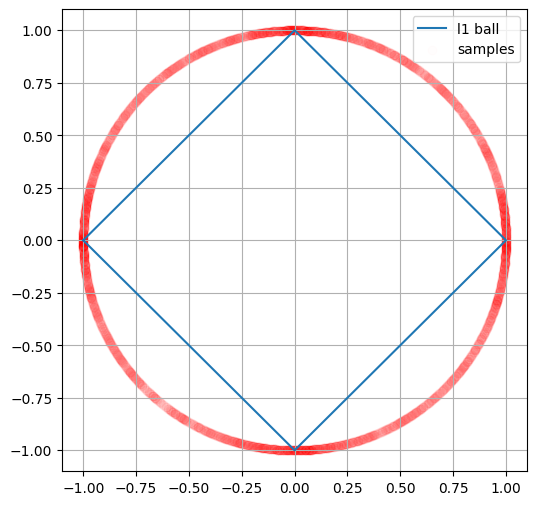

In [112]:
samples_norm = samples / torch.norm(samples, p=2, dim=1, keepdim=True)

x_coords_norm, y_coords_norm = list(zip(*samples_norm))
plt.plot(x_coords_box, y_coords_box, marker='', label='l1 ball')
plt.scatter(x_coords_norm, y_coords_norm, color='red', label='samples', s=40, alpha=0.008)  # Adjust color as needed
plt.grid(True)
plt.legend()
plt.show()